In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
size = 100

In [3]:
f = np.random.multivariate_normal(np.zeros(size), cov=np.identity(size), size=1)
f.shape

(1, 100)

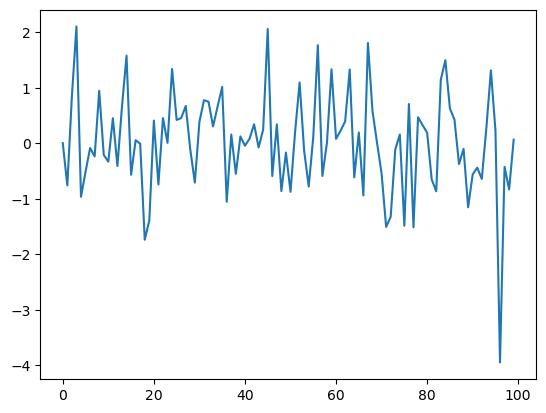

In [4]:
plt.plot(f.T)

In [5]:
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0.2
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

In [6]:
f = np.random.multivariate_normal(np.zeros(size), cov=cov, size=1)

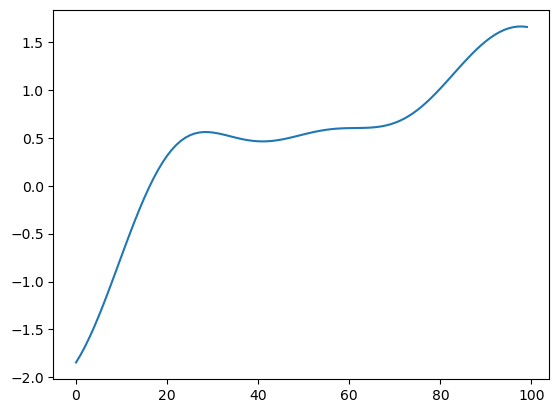

In [7]:
plt.plot(f.T)

In [8]:
size = 21
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
x.shape

(441, 2)

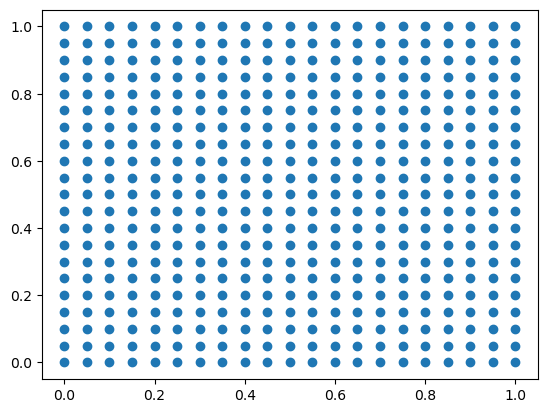

In [9]:
plt.scatter(x[:,0], x[:,1])

In [10]:
@jit
def compute_Sigma(N_gridpoints,l):

    cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
    for i in range(N_gridpoints**2):
        for j in range(N_gridpoints**2):
            cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))
            
    return cov

In [11]:
cov = compute_Sigma(21,0.2)

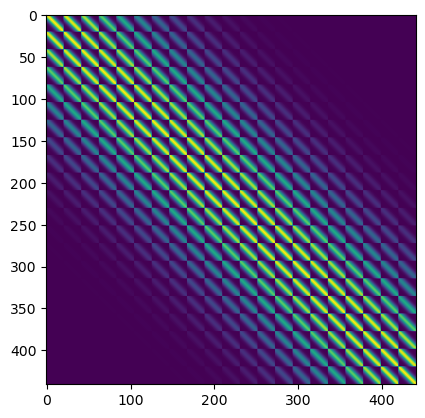

In [12]:
plt.imshow(cov)

In [13]:
f = np.random.multivariate_normal(np.zeros(size**2), cov=cov, size=1)
Deltaf = np.amax(f) - np.amin(f)
f = f/Deltaf*0.97
f = f - np.amin(f) + 0.02
f = f.flatten()

0.02
0.9900000000000001


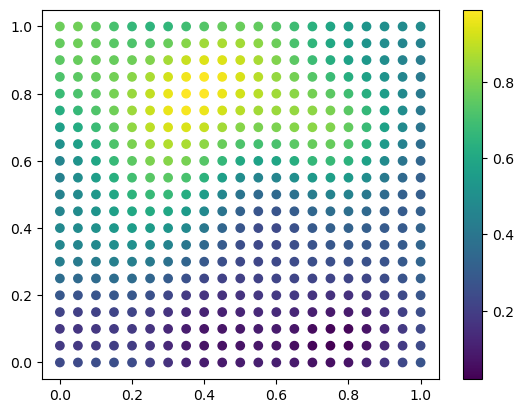

In [14]:
plt.scatter(x[:,0], x[:,1], c=f)
plt.colorbar()
print(np.amin(f))
print(np.amax(f))

In [15]:
from scipy.interpolate import RBFInterpolator

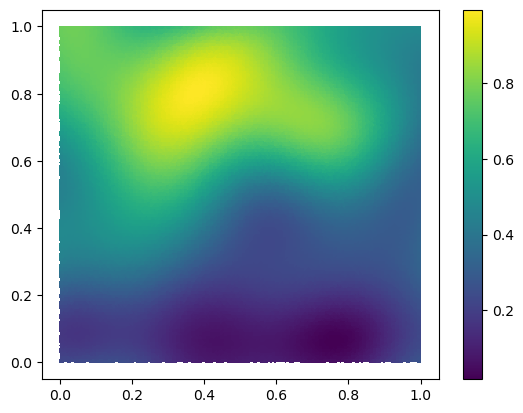

In [17]:
function = RBFInterpolator(x, f, kernel='gaussian', epsilon=0.2/(1/20))
size = 100
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T
f_i = function(x_i)
plt.tripcolor(x_i[:,0], x_i[:,1], f_i)
plt.colorbar()

In [18]:
print(np.amax(f_i))
print(np.amin(f_i))

0.9939537048339844
0.0180511474609375


In [23]:
d = 2
N_gridpoints = 21
l = 0.2
positive = True

X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
for i in range(N_gridpoints**2):
    for j in range(N_gridpoints**2):
        cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))
        
GRF = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)

if positive==True:    
    DeltaGRF = np.amax(GRF) - np.amin(GRF)
    GRF = GRF/DeltaGRF*0.97
    GRF = GRF - np.amin(GRF) + 0.02

    GRF = GRF.flatten()

GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))

In [467]:
GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))